In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
milestones = pd.read_csv('data/nycMilestones.csv')

In [41]:
# milestones.head()
milestones.boro.nunique()

6

In [3]:
milestones["orig_start_date"] = pd.to_datetime(milestones['orig_start_date'])
milestones["orig_end_date"] = pd.to_datetime(milestones['orig_end_date'])
milestones["task_start_date"] = pd.to_datetime(milestones['task_start_date'])
milestones["task_end_date"] = pd.to_datetime(milestones['task_end_date'])

In [47]:
# (milestones['task_start_date'] - milestones['orig_start_date']) / np.timedelta64(1, 'M')\
small = pd.DataFrame()
small[["project_id","managing_agency","boro","orig_start","actual_start"]] = milestones[["project_id","managing_agcy","boro","orig_start_date","task_start_date"]]

In [48]:
# milestones[milestones['task_start_date'] < milestones['orig_start_date']].head()
small["starting_delay_m"]= ((milestones.task_start_date - milestones.orig_start_date)/np.timedelta64(1, 'M'))
small["ending_delay_m"]= ((milestones.task_end_date - milestones.orig_end_date)/np.timedelta64(1, 'M'))

In [68]:
# small["delay_m"].describe()
# small[small["delay_m"] < 0].head()
# save the small dataframe
small.to_csv('data/small.csv')

/var/folders/3n/g3gstzkx6tvgblfrrfq2mjl80000gn/T/ipykernel_16567/28478136.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  small.groupby('managing_agency').mean().plot(kind='bar');


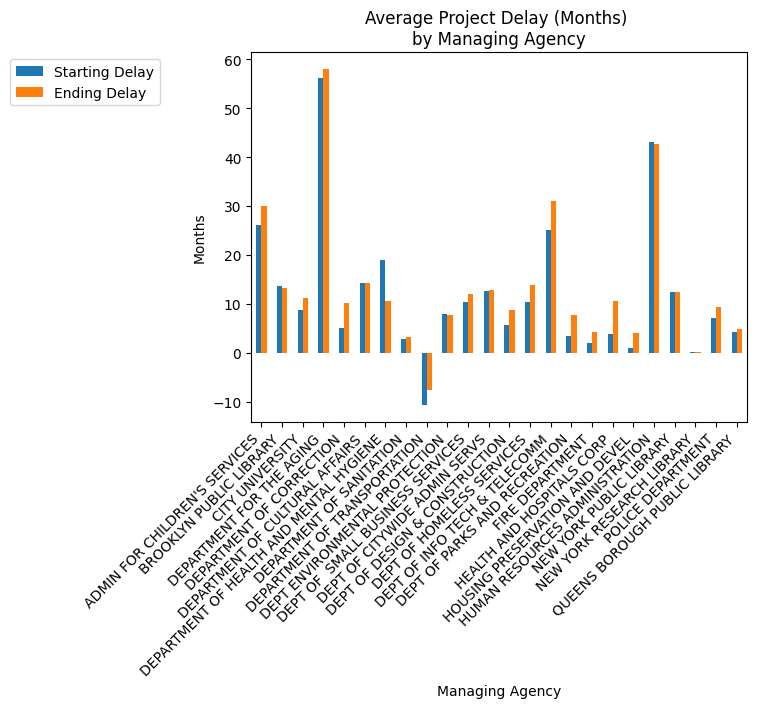

In [61]:
# group the small data frame by the boro column and get the average of delay_m
# small.groupby('boro').mean()
small.groupby('managing_agency').mean().plot(kind='bar');
plt.title('Average Project Delay (Months) \nby Managing Agency');
plt.ylabel('Months');
plt.xlabel('Managing Agency');
plt.xticks(rotation=45,ha='right');
# plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1));
# change the labels in the legend 
plt.legend(['Starting Delay','Ending Delay'],loc='upper left', bbox_to_anchor=(-0.5, 1));

/var/folders/3n/g3gstzkx6tvgblfrrfq2mjl80000gn/T/ipykernel_16567/1790777734.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  small.groupby('managing_agency').mean().plot(kind='barh');


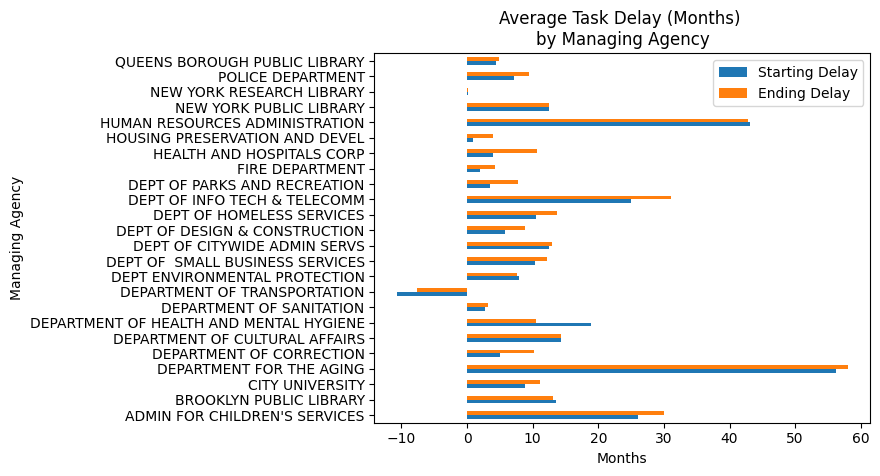

In [67]:
# remake the plot above but change it to be a horizonatal bar chart
small.groupby('managing_agency').mean().plot(kind='barh');
plt.title('Average Task Delay (Months) \nby Managing Agency');
plt.ylabel('Managing Agency');
plt.xlabel('Months');
plt.legend(['Starting Delay','Ending Delay'],loc='upper right');
# save the plot as a png file
plt.savefig('images/avg_delay_by_agency.png');